In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
laptop_data = pd.read_csv('Downloads/archive/laptop/laptop_price.csv')
laptop_data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
laptop_data.drop(['laptop_ID',
                  'Product',
                  'ScreenResolution',
                  'Cpu',
                  'Gpu',
                  'Weight',
                  'Memory'], inplace=True, axis=1)

In [4]:
laptop_data.sample(10)

,Company,TypeName,Inches,Ram,OpSys,Price_euros
320,HP,Notebook,14.0,8GB,Windows 10,1292.00
536,Dell,Notebook,15.6,8GB,Windows 10,797.41
603,MSI,Gaming,17.3,16GB,Windows 10,2199.00
1276,Dell,Notebook,15.6,6GB,Windows 10,459.00
486,Dell,Workstation,15.6,16GB,Windows 10,2338.00
331,Toshiba,Notebook,15.6,8GB,Windows 10,943.00
512,Dell,Notebook,15.6,8GB,Windows 10,836.00
606,Toshiba,Notebook,15.6,8GB,Windows 10,1399.00
1300,Lenovo,Notebook,14.0,2GB,Windows 10,229.00
935,HP,Netbook,12.5,8GB,Windows 10,1669.00


C:\Users\jmendoza9\venv\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 51.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jmendoza9\venv\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 54.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


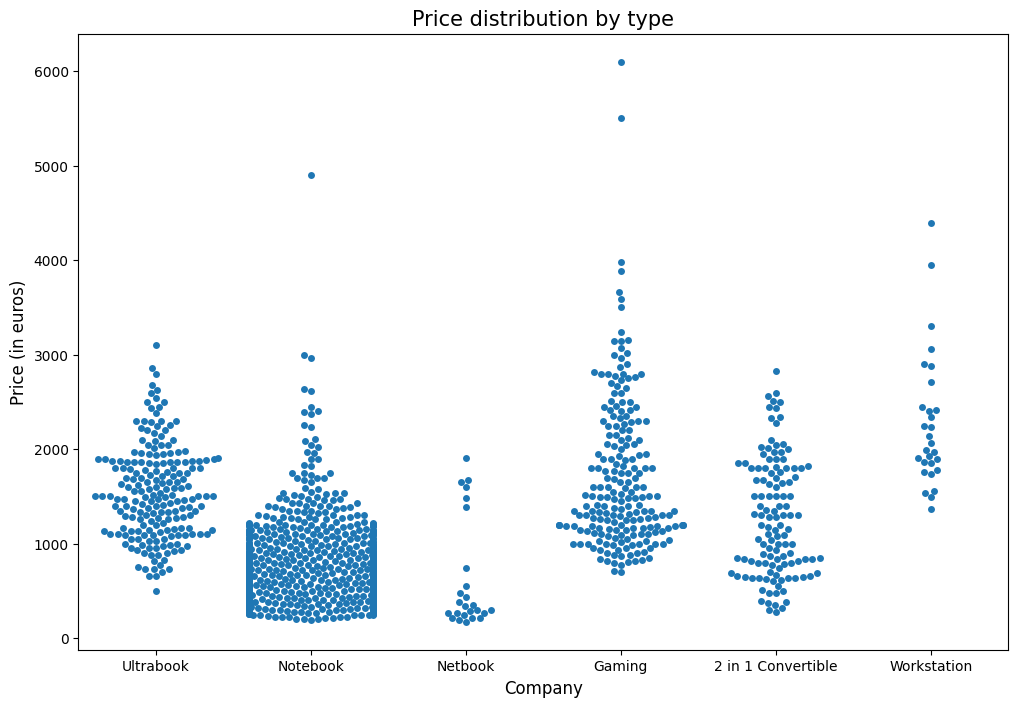

In [5]:
plt.figure(figsize=(12,8))

sns.swarmplot(x='TypeName', y='Price_euros', data=laptop_data)

plt.title('Price distribution by type', fontsize=15)

plt.xlabel('Company', fontsize=12)
plt.ylabel('Price (in euros)', fontsize=12)
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

laptop_data['TypeName'] = label_encoder.fit_transform(laptop_data['TypeName'])

In [7]:
laptop_data.head()

,Company,TypeName,Inches,Ram,OpSys,Price_euros
0,Apple,4,13.3,8GB,macOS,1339.69
1,Apple,4,13.3,8GB,macOS,898.94
2,HP,3,15.6,8GB,No OS,575.00
3,Apple,4,15.4,16GB,macOS,2537.45
4,Apple,4,13.3,8GB,macOS,1803.60


In [8]:
dummy_laptop_data = pd.get_dummies(laptop_data)

dummy_laptop_data.head()

,TypeName,Inches,Price_euros,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,...,Ram_8GB,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,4,13.3,1339.69,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,4,13.3,898.94,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,3,15.6,575.00,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,4,15.4,2537.45,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,13.3,1803.60,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [9]:
dummy_laptop_data.shape

(1303, 40)

In [12]:
X = dummy_laptop_data.drop('Price_euros', axis=1)
y = dummy_laptop_data['Price_euros']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
X_train.shape, X_test.shape

((1042, 39), (261, 39))

In [15]:
y_train.shape, y_test.shape

((1042,), (261,))

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train)

LinearRegression()

In [19]:
linear_regression.score(X_train, y_train)

0.6766031109487971

In [20]:
y_pred = linear_regression.predict(X_test)
r2_score(y_test, y_pred)

-2.6240466699618583e+19